In [2]:
import numpy as np
import math 
from copy import deepcopy
import matplotlib.pyplot as plt
from tqdm import tqdm

# https://towardsdatascience.com/deep-q-learning-tutorial-mindqn-2a4c855abffc 

Part 1
Question 1

In [3]:
na = np.nan
# Transition matrix, where the first column is a(2) and the diagonal plus lower right value is a(1)
T = np.array([[1, 1, na, na, na],
              [1, na, 1, na, na],
              [1, na, na, 1, na],
              [1, na, na, na, 1],
              [1, na, na, na, 1]])
T1 = np.array([[na, 1, na, na, na],
              [na, na, 1, na, na],
              [na, na, na, 1, na],
              [na, na, na, na, 1],
              [na, na, na, na, 1]])
T1 = [1, 2, 3, 4, 4]
T2 = np.array([[1, na, na, na, na],
              [1, na, na, na, na],
              [1, na, na, na, na],
              [1, na, na, na, na],
              [1, na, na, na, na]])
T2 = [0, 0, 0, 0, 0]
# Reward matrix, where the first column is a(2) and the diagonal plus lower right value is a(1)
R = np.array([[.2, 0, na, na, na],
              [0, na, 0, na, na],
              [0, na, na, 0, na],
              [0, na, na, na, 0],
              [0, na, na, na, 1]])
R1 = np.array([[na, 0, na, na, na],
              [na, na, 0, na, na],
              [na, na, na, 0, na],
              [na, na, na, na, 0],
              [na, na, na, na, 1]])
R1 = [0, 0, 0, 0, 1]
R2 = np.array([[.2, na, na, na, na],
              [0, na, na, na, na],
              [0, na, na, na, na],
              [0, na, na, na, na],
              [0, na, na, na, na]])
R2 = [0.2, 0, 0, 0, 0]

# Q table for all states (1-5/0-4)
Q_table = np.array([[0, 0.2],
                    [0, 0],
                    [0, 0],
                    [0, 0],
                    [1, 0]])
# Discount factor
gamma = 0.9 

In [31]:
'''
Epsilon greedy: try random (in this case 'min') move with epsilon probability
'''
def epsilon_greedy(next_state, action, Q_table, eps):
    if np.random.random() < eps:
        # Minimum since only 2 options
        return np.min(Q_table[next_state])
    else:
        return np.max(Q_table[next_state])

'''
Function to run Part 1 with different Q-tables, Transisition- and Reward matrices
'''
def part_1(states = 5, convergence_crit = 0.0001, epsilon = 0, alpha = 0.1, do_print = False, do_print_first = False, bellman = True):

    if states == 5:
        # Q table for all states (1-5/0-4)
        Q_table = np.array([[0, 0.2], [0, 0], [0, 0], [0, 0], [1, 0]])
        T1 = [1, 2, 3, 4, 4]
        T2 = [0, 0, 0, 0, 0]
        R1 = [0, 0, 0, 0, 1]
        R2 = [0.2, 0, 0, 0, 0]
    else: # states == 10
        # Q table for all states (1-10/0-9)
        Q_table = np.array([[0, 0.2], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 0]] )
        T1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 9]
        T2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        R1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
        R2 = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0]

    last_Q_table = np.array([np.inf])
    epochs = 0
    while np.abs(np.sum(Q_table) - np.sum(last_Q_table)) > convergence_crit:
        #print(np.abs(np.sum(Q_table) - np.sum(last_Q_table)))
        epochs += 1
        last_Q_table = deepcopy(Q_table)
        for state in range(len(Q_table)):
            
            ''' Action 1: '''
            next_state = T1[state]
            #Q_table[state][0] = R[state, next_state] + gamma * epsilon_greedy(next_state, 1, last_Q_table, epsilon)
            if bellman: Q_table[state][0] = R1[state] + gamma * epsilon_greedy(next_state, 1, last_Q_table, epsilon)
            else: Q_table[state][0] = Q_table[state][0] + alpha * (R1[state] + gamma * epsilon_greedy(next_state, 1, last_Q_table, epsilon) - Q_table[state][0])

            ''' Action 2: '''
            next_state = T2[state]
            #Q_table[state][1] = R[state, next_state] + gamma * epsilon_greedy(next_state, 2, last_Q_table, epsilon)
            if bellman: Q_table[state][1] = R2[state] + gamma * epsilon_greedy(next_state, 2, last_Q_table, epsilon)
            else: Q_table[state][1] = Q_table[state][1] + alpha * ( R2[state] + gamma * epsilon_greedy(next_state, 2, last_Q_table, epsilon) - Q_table[state][1])

        # Print first iteration: so can check if correct
        if epochs == 1 and do_print_first:  print( Q_table)

        # If more than 3 million epochs abort
        if epochs > 3e6: 
            return None
    if do_print:
        print(epochs)
        print(Q_table)
    return epochs

In [35]:
epochs = part_1(states = 5, convergence_crit=1e-10, do_print=True, bellman=True, do_print_first=True, epsilon=0)

[[0.   0.38]
 [0.   0.18]
 [0.   0.18]
 [0.9  0.18]
 [1.9  0.18]]
241
[[ 6.561   6.1049]
 [ 7.29    5.9049]
 [ 8.1     5.9049]
 [ 9.      5.9049]
 [10.      5.9049]]


[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09]
[20609, 10646, 7229, 5492, 4436, 3725, 3214, 2827, 2525, 2282, 2082, 1915, 1773, 1651, 1545, 1452, 1369, 1296, 1230, 1170, 1116, 1067, 1022, 981, 943, 908, 875, 845, 817, 790, 765, 742, 720, 699, 680, 662, 644, 628, 612, 597, 583, 569, 556, 544, 532, 521, 510, 499, 489, 480, 470, 462, 453, 445, 437, 429, 422, 415, 408, 401, 394, 388, 382, 376, 370, 365, 359, 354, 349, 344, 339, 335, 330, 326, 321, 317, 313, 309, 305, 301, 298, 294, 290, 287, 2

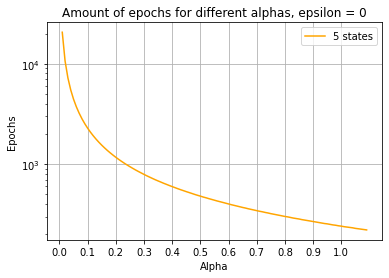

In [50]:
'''
Running Part 1 for 5 states: impact alpha
'''
impact_alpha = []
alphas = np.arange(0.01, 1.1 ,.01)
for alpha in alphas:
    #print(alpha)
    epochs = part_1(states = 5, convergence_crit=1e-10, do_print=False, alpha = alpha, bellman=False, do_print_first=False, epsilon=0)
    impact_alpha.append(epochs)

    
print(alphas)
print(impact_alpha)

plt.plot(alphas, impact_alpha, label = "5 states" , c='orange')
plt.xlabel('Alpha')
plt.ylabel('Epochs')
plt.title('Amount of epochs for different alphas, epsilon = 0')
plt.xticks(np.arange(0, 1.1, .1))
plt.yscale('log')
plt.savefig('part_1_5states_alphas_eps=0.pdf')
plt.grid()
plt.legend()
plt.show()

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]


  0%|          | 0/10 [00:00<?, ?it/s]

0.0
0.01
0.02


 30%|███       | 3/10 [00:00<00:01,  6.57it/s]

0.03


 40%|████      | 4/10 [00:02<00:04,  1.40it/s]

0.04


 50%|█████     | 5/10 [00:22<00:33,  6.70s/it]

0.05


 60%|██████    | 6/10 [01:29<01:42, 25.67s/it]

0.06


 60%|██████    | 6/10 [05:27<03:38, 54.54s/it]


[0.   0.01 0.02 0.03 0.04 0.05]
[241, 370, 4689, 24147, 242496, 886225]


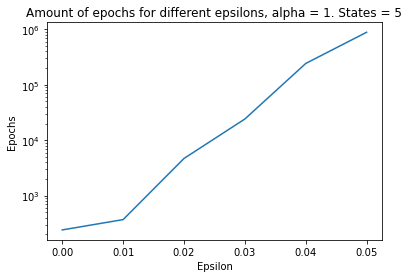

In [39]:
'''
Running Part 1 for 5 states: impact epsilon
'''
impact_epsilon_5 = []
epsilons = np.arange(0, 0.1 ,.01)
print(epsilons)
for epsilon in tqdm(epsilons):
    print(epsilon)
    #print(alpha)
    epochs = part_1(states = 5, convergence_crit=1e-10, do_print=False, alpha = 0, bellman=True, do_print_first=False, epsilon=epsilon)
    if epochs == None:
        break
    impact_epsilon_5.append(epochs)

    
print(epsilons[:len(impact_epsilon_5)])
print(impact_epsilon_5)

plt.plot(epsilons[:len(impact_epsilon_5)], impact_epsilon_5, label = "batch_size = 16" )
plt.xlabel('Epsilon')
plt.ylabel('Epochs')
plt.title('Amount of epochs for different epsilons, alpha = 1. States = 5')
plt.xticks(epsilons[:len(impact_epsilon_5)])
plt.yscale('log')
plt.savefig('part_1_5states_epsilons_alpha=1.pdf')
plt.show()

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]


  0%|          | 0/10 [00:00<?, ?it/s]

0.0
0.01


 20%|██        | 2/10 [00:00<00:00,  9.12it/s]

0.02


 30%|███       | 3/10 [00:02<00:06,  1.09it/s]

0.03


 40%|████      | 4/10 [00:05<00:11,  1.89s/it]

0.04


 40%|████      | 4/10 [06:40<10:00, 100.02s/it]


[0.   0.01 0.02 0.03]
[247, 1186, 12210, 24340]


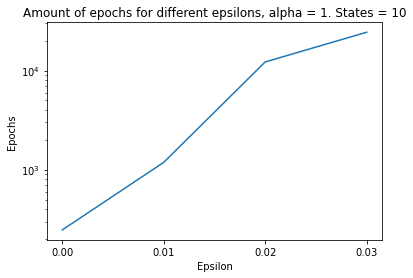

In [45]:
'''
Running Part 1 for 10 states
'''
'''
Running Part 1 for 5 states: impact epsilon
'''
impact_epsilon_10 = []
epsilons = np.arange(0, 0.1 ,.01)
print(epsilons)
for epsilon in tqdm(epsilons):
    print(epsilon)
    #print(alpha)
    epochs = part_1(states = 10, convergence_crit=1e-10, do_print=False, alpha = 0, bellman=True, do_print_first=False, epsilon=epsilon)
    if epochs == None:
        break
    impact_epsilon_10.append(epochs)

    
print(epsilons[:len(impact_epsilon_10)])
print(impact_epsilon_10)

plt.plot(epsilons[:len(impact_epsilon_10)], impact_epsilon_10, label = "batch_size = 16" )
plt.xlabel('Epsilon')
plt.ylabel('Epochs')
plt.title('Amount of epochs for different epsilons, alpha = 1. States = 10')
plt.xticks(epsilons[:len(impact_epsilon_10)])
plt.yscale('log')
plt.savefig('part_1_10states_epsilons_alpha=1.pdf')
plt.show()

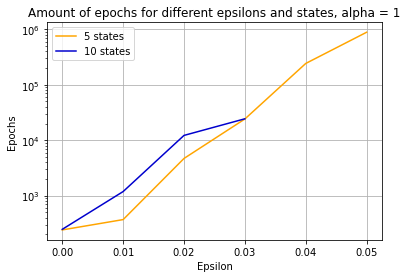

In [55]:
#TODO: Put both epsilons in one figure

plt.plot(epsilons[:len(impact_epsilon_5)], impact_epsilon_5, label = "5 states", c="orange" )
plt.plot(epsilons[:len(impact_epsilon_10)], impact_epsilon_10, label = "10 states" , c='mediumblue')
plt.xlabel('Epsilon')
plt.ylabel('Epochs')
plt.title('Amount of epochs for different epsilons and states, alpha = 1')
plt.xticks(epsilons[:len(impact_epsilon_5)])
plt.yscale('log')
plt.legend()
plt.grid()
plt.savefig('part_1_10and5states_epsilons_alpha=1.pdf')
plt.show()

Part 2 : Function approximations